In [9]:
# Import libraries:
import scipy.io
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Practical Exercise 5 (Decision boundaries)

In this exercise, we will model data sets of two classes using two Gaussian distributions and illustrate the decision boundary. This boundary marks the line (in case of 2D variables) where the posterior probability of class $\omega_0$ equals the posterior probability of class $\omega_1$, i.e. $P(\omega_0|x)=P(\omega_1|x)$.

Load the matlab file ```twoClasses.mat```, containing the 2D observation vectors **patterns** and the **targets** variable for the corresponding class labels. Note that the observations are sorted with respect to their class, i.e. the first 2000 observations are from class $\omega_0$ and the remaining 2000 observations are from class $\omega_1$.

#### Part a.

- Load data: Extract *patterns* and *targets*.
- Store patterns with help variables separating each sensor signal for each class.

In [20]:
# Load matlab file containing patterns and targets:
twoClasses = scipy.io.loadmat('../../data/sheet5/twoClasses.mat')

# Extract patterns and targets:
patterns = twoClasses['patterns']
targets = twoClasses['targets'][0]

# Check dimensions:
print('patterns shape:', patterns.shape)
print('targets shape:', targets.shape)

patterns shape: (2, 4000)
targets shape: (4000,)


In [24]:
# Show the first 5 observations of class omega_0 and omega_1:
print('first 5 observations of class omega_0:\n', np.round(patterns[:,0:5],4))
print('\nfirst 5 observations of class omega_1:\n', np.round(patterns[:,2000:2005],4))

# Show the first 5 class labels of class omega_0 and omega_1:
print('\nfirst 5 class labels of class omega_0:\n', targets[0:5])
print('\nfirst 5 class labels of class omega_1:\n', targets[2000:2005])

first 5 observations of class omega_0:
 [[ 3.6642  4.9162  3.9818  5.3453  2.5478]
 [20.0939 15.3323 16.6113 15.4816 18.4773]]

first 5 observations of class omega_1:
 [[ 6.4823  6.3001  6.1701  7.1481  6.5194]
 [16.9174 19.8422 18.3116 18.4216 20.0131]]

first 5 class labels of class omega_0:
 [0 0 0 0 0]

first 5 class labels of class omega_1:
 [1 1 1 1 1]


In [29]:
# Separate sensor signals for both classes:
c0_s1 = patterns[0,:2000]
c0_s2 = patterns[1,:2000]
c1_s1 = patterns[0,2000:]
c1_s2 = patterns[1,2000:]

# Separate target labels for both classes:
t0 = targets[:2000]
t1 = targets[2000:]

#### Part b.

We next aim at modeling the data of each class with an individual normal distribution (see the lecture for details). These two models can be later used to compute the likelihoods $p(x|\omega_0)$ and $p(x|\omega_1)$ for each class and each observation vector x.

First, we must decide whether to use a Gaussian model with independent or dependent components. How would you decide on that question? After selecting an appropriate modeling, we must estimate the model parameters (mean vector, variance vector or covariance matrix) using the same techniques as in Practice Sheet 4.

Plot the two point distributions of the classes in different colors and superimpose the contours of the two Gaussian distributions using the function contour. Assure that you achieve an appropriate modeling of each class before continuing.

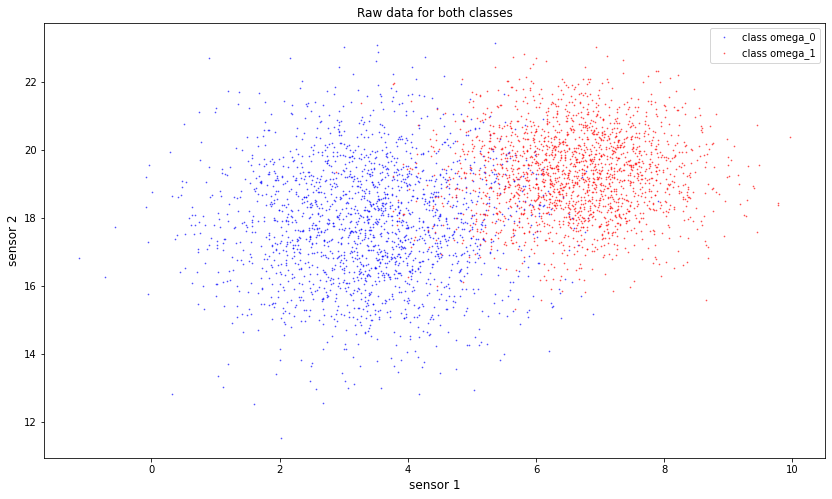

In [47]:
## Get familiar with raw data by visual inspection:

# Initialize plot:
fig = plt.figure(figsize=(14,8))

# Initialize first subplot:
ax1 = fig.add_subplot(111)

# Add scatterplots for classes omega_0 and omega_1:
ax1.scatter(x=c0_s1, y=c0_s2, c='blue', marker='.', s=2, alpha=0.6, label='class omega_0')
ax1.scatter(x=c1_s1, y=c1_s2, c='red', marker='.', s=2, alpha=0.6, label='class omega_1')

# Add title, label axes and add legend:
ax1.set_title('Raw data for both classes', fontsize=12)
ax1.set_xlabel('sensor 1', fontsize=12)
ax1.set_ylabel('sensor 2', fontsize=12)
ax1.legend()

plt.show()

In [36]:
## Looks like we have independent components for both classes.
## To further proof that intuition, compute covariance matrices:

print('covariance for class omega_0\n', np.cov([c0_s1, c0_s2]))
print('\ncovariance for class omega_1\n', np.cov([c1_s1, c1_s2]))

# Find both covariance matrices to be (almost) diagonal, hence decide to model the distributions for
# both classes with independent components!

covariance for class omega_0
 [[1.54522061 0.00532258]
 [0.00532258 3.1228906 ]]

covariance for class omega_1
 [[1.03729385 0.01540712]
 [0.01540712 1.59645517]]


In [39]:
## Model data for both classes as 2D Gaussians with independent components.

# Get mean and standard deviations seperately for each dimension (= sensor signals):
c0_mean_s1 = np.mean(c0_s1)
c0_mean_s2 = np.mean(c0_s2)
c0_std_s1 = np.std(c0_s1)
c0_std_s2 = np.std(c0_s2)

c1_mean_s1 = np.mean(c1_s1)
c1_mean_s2 = np.mean(c1_s2)
c1_std_s1 = np.std(c1_s1)
c1_std_s2 = np.std(c1_s2)

# Get min and max seperately for each dimension:
c0_min_s1 = np.min(c0_s1)
c0_min_s2 = np.min(c0_s2)
c0_max_s1 = np.max(c0_s1)
c0_max_s2 = np.max(c0_s2)

c1_min_s1 = np.min(c1_s1)
c1_min_s2 = np.min(c1_s2)
c1_max_s1 = np.max(c1_s1)
c1_max_s2 = np.max(c1_s2)

# Print result:
print('class omega_0:\n==============')
print('mean for sensor 1 (x-direction):', np.round(c0_mean_s1,2))
print('mean for sensor 2 (y-direction):', np.round(c0_mean_s2,2))
print('std. dev. for sensor 1 (x-direction):', np.round(c0_std_s1,2))
print('std. dev. for sensor 2 (y-direction):', np.round(c0_std_s2,2))

print('\nclass omega_1:\n==============')
print('mean for sensor 1 (x-direction):', np.round(c1_mean_s1,2))
print('mean for sensor 2 (y-direction):', np.round(c1_mean_s2,2))
print('std. dev. for sensor 1 (x-direction):', np.round(c1_std_s1,2))
print('std. dev. for sensor 2 (y-direction):', np.round(c1_std_s2,2))

class omega_0:
mean for sensor 1 (x-direction): 3.4
mean for sensor 2 (y-direction): 17.8
std. dev. for sensor 1 (x-direction): 1.24
std. dev. for sensor 2 (y-direction): 1.77

class omega_1:
mean for sensor 1 (x-direction): 6.6
mean for sensor 2 (y-direction): 19.3
std. dev. for sensor 1 (x-direction): 1.02
std. dev. for sensor 2 (y-direction): 1.26


In [55]:
# Create mesh grid with respect to given limits in x- and y-direction for samples in class omega_0:
c0_mesh_x, c0_mesh_y = np.mgrid[c0_min_s1:c0_max_s1:.01, c0_min_s2:c0_max_s2:.01]

# Compute corresponding univariate normal distributions for class omega_0:
c0_normal_dist_x = 1 / np.sqrt(2 * np.pi * c0_std_s1**2) * np.exp(-((c0_mesh_x-c0_mean_s1)**2) / (2 * c0_std_s1**2))
c0_normal_dist_y = 1 / np.sqrt(2 * np.pi * c0_std_s2**2) * np.exp(-((c0_mesh_y-c0_mean_s2)**2) / (2 * c0_std_s2**2))

# Compute joint probability density function as product of two independent distributions for class omega_0:
c0_normal_dist_xy = c0_normal_dist_x * c0_normal_dist_y


# Create mesh grid with respect to given limits in x- and y-direction for samples in class omega_1:
c1_mesh_x, c1_mesh_y = np.mgrid[c1_min_s1:c1_max_s1:.01, c1_min_s2:c1_max_s2:.01]

# Compute corresponding univariate normal distributions for class omega_1:
c1_normal_dist_x = 1 / np.sqrt(2 * np.pi * c1_std_s1**2) * np.exp(-((c1_mesh_x-c1_mean_s1)**2) / (2 * c1_std_s1**2))
c1_normal_dist_y = 1 / np.sqrt(2 * np.pi * c1_std_s2**2) * np.exp(-((c1_mesh_y-c1_mean_s2)**2) / (2 * c1_std_s2**2))

# Compute joint probability density function as product of two independent distributions for class omega_1:
c1_normal_dist_xy = c1_normal_dist_x * c1_normal_dist_y

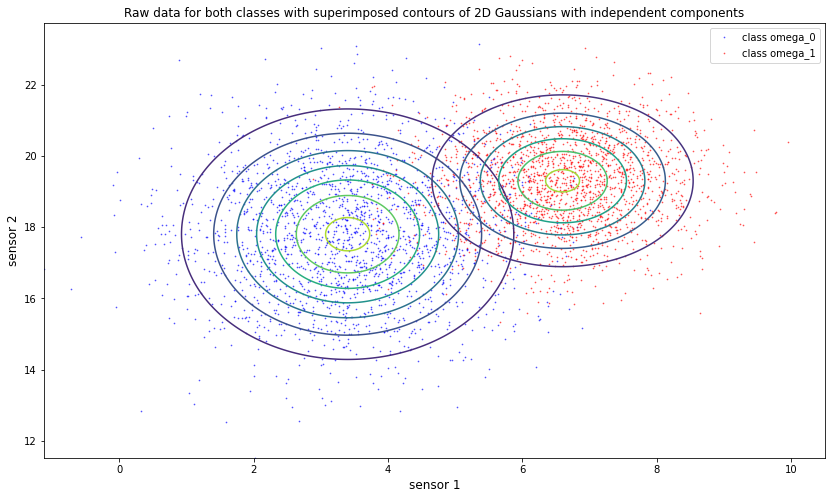

In [56]:
## Superimpose contour plots of 2D Gaussians that model raw data:

# Initialize plot:
fig = plt.figure(figsize=(14,8))

# Initialize first subplot:
ax1 = fig.add_subplot(111)

# Add scatterplots for classes omega_0 and omega_1:
ax1.scatter(x=c0_s1, y=c0_s2, c='blue', marker='.', s=2, alpha=0.6, label='class omega_0')
ax1.scatter(x=c1_s1, y=c1_s2, c='red', marker='.', s=2, alpha=0.6, label='class omega_1')

# Add contour plot modelling the data as 2D Gaussian distribution with independent components:
ax1.contour(c0_mesh_x, c0_mesh_y, c0_normal_dist_xy)
ax1.contour(c1_mesh_x, c1_mesh_y, c1_normal_dist_xy)

# Add title, label axes and add legend:
ax1.set_title('Raw data for both classes with superimposed contours of 2D Gaussians with independent components', fontsize=12)
ax1.set_xlabel('sensor 1', fontsize=12)
ax1.set_ylabel('sensor 2', fontsize=12)
ax1.legend()

plt.show()

#### Part c.

Generate 3D plots of the two likelihoods and the posterior probability.

In [111]:
## First step is to create a mesh that covers ALL data from both classes:

# Create mesh grid with respect to given limits in x- and y-direction for samples in both classes:
mesh_x, mesh_y = np.mgrid[min(c0_min_s1, c1_min_s1):max(c0_max_s1, c1_max_s1):.01, min(c0_min_s2, c1_min_s2):max(c0_max_s2,c1_max_s2):.01]

# Compute corresponding univariate normal distributions for class omega_0:
c0_normal_dist_x = 1 / np.sqrt(2 * np.pi * c0_std_s1**2) * np.exp(-((mesh_x-c0_mean_s1)**2) / (2 * c0_std_s1**2))
c0_normal_dist_y = 1 / np.sqrt(2 * np.pi * c0_std_s2**2) * np.exp(-((mesh_y-c0_mean_s2)**2) / (2 * c0_std_s2**2))

# Compute joint probability density function as product of two independent distributions for class omega_0:
c0_normal_dist_xy = c0_normal_dist_x * c0_normal_dist_y

# Compute corresponding univariate normal distributions for class omega_1:
c1_normal_dist_x = 1 / np.sqrt(2 * np.pi * c1_std_s1**2) * np.exp(-((mesh_x-c1_mean_s1)**2) / (2 * c1_std_s1**2))
c1_normal_dist_y = 1 / np.sqrt(2 * np.pi * c1_std_s2**2) * np.exp(-((mesh_y-c1_mean_s2)**2) / (2 * c1_std_s2**2))

# Compute joint probability density function as product of two independent distributions for class omega_1:
c1_normal_dist_xy = c1_normal_dist_x * c1_normal_dist_y

# Add both joint probabilities:
c0c1_normal_dist_xy = c0_normal_dist_xy + c1_normal_dist_xy

In [109]:
# Create color grid:
color_grid = np.zeros(mesh_x.shape).astype(str)
color_grid[:,:] = 'red'

# Set color to blue where likelihood for class omega1 is larger than for class omega0:
color_grid[(c0_normal_dist_xy < c1_normal_dist_xy)] = 'blue'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


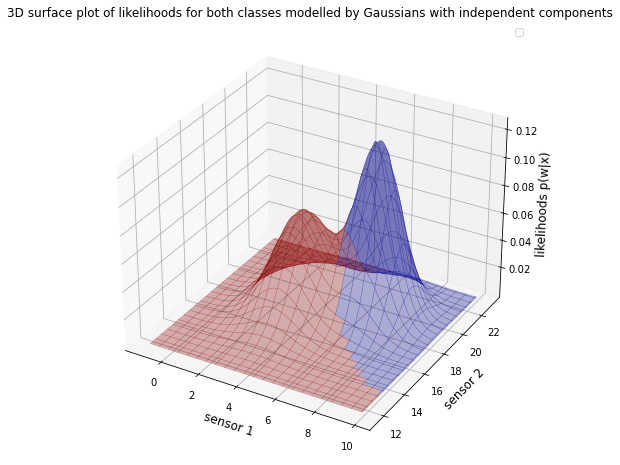

In [110]:
## Plot modelled liklihoods as 3D surface plot.
## Mark decision regions by different colors:

# Initialize plot:
fig = plt.figure(figsize=(14,8))

# Initialize first subplot:
ax1 = fig.add_subplot(111, projection='3d')

# Add surface plot modelling the data as 2D Gaussian distribution with independent components:
# ax1.plot_surface(c0_mesh_x, c0_mesh_y, c0_normal_dist_xy, rstride=50, cstride=50, color='red', edgecolors='k', lw=0.1, antialiased=False)
ax1.plot_surface(mesh_x, mesh_y, c0c1_normal_dist_xy, rstride=50, cstride=50, facecolors=color_grid, edgecolors='k', lw=0.4, alpha=0.3)
#ax1.plot_surface(c1_mesh_x, c1_mesh_y, c1_normal_dist_xy, cmap='coolwarm', linewidth=0, antialiased=False)

# Add title, label axes and add legend:
ax1.set_title('3D surface plot of likelihoods for both classes modelled by Gaussians with independent components', fontsize=12)
ax1.set_xlabel('sensor 1', fontsize=12)
ax1.set_ylabel('sensor 2', fontsize=12)
ax1.set_zlabel('likelihoods p(w|x)', fontsize=12)
ax1.legend()

plt.show()

### Discussion

Here, we show both likelihoods $p(x|\omega_0)$ and $p(x|\omega_1)$ as sum of both in a 3D surface plot.
To obtain the posteriors, we only need the prior probabilities $p(\omega_0)$ and $p(\omega_1)$, respectively. Both can be estimated from the number of observations of both classes in the input data. In this case, we have an identical number of observations for both classes, resulting in posteriors equal to $0.5$. Multiplication with the likelihoods yields the posteriors.

The decision regions are colored in *red* and *blue*, respectively. The line where the color changes marks the decision boundary.